In [422]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams  ## run command settings for plotting
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_score, roc_curve, roc_auc_score
#导入必要的库
#设置画图参数
config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['SimHei'],
    "font.size": 10,   # 字号
    'axes.unicode_minus': False # 处理负号
}
rcParams.update(config)

In [423]:
path=r'D:\My_files_in_GZU\学习\大二\机器学习\machine-learning\4th_homework\ex2data1.txt'
data=pd.read_csv(path, header=None)
data.head()


,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [424]:
data.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [425]:
cols = data.shape[1]
data.insert(0, 'ones', 1)#在第一行插入全1
X_data = data.iloc[:,:cols-1]
y_data = data.iloc[:,:cols]

In [426]:
cols=data.shape[1]
X_data=data.iloc[:,:cols-1]
y_data=data.iloc[:,cols-1:]
X=X_data.values
y=y_data.values
(X.shape,y.shape)

((100, 3), (100, 1))

In [427]:
#划分数据集
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=50)

In [428]:
for i in range(1, cols-1):
    min = x_train[:, i].min()
    max = x_train[:, i].max()
    x_train[:, i] = (x_train[:, i] - min) / (max - min)
    x_test[:, i] = (x_test[:, i] - min) / (max - min)

In [429]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((75, 3), (75, 1), (25, 3), (25, 1))

In [430]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [431]:
feature_dim = x_train.shape[1]
W = np.zeros((feature_dim,1))
feature_dim,W

(3,
 array([[0.],
        [0.],
        [0.]]))

In [432]:
def computeCost(X, Y, W):
    P = sigmoid(X@W)
    loss = np.sum(-Y*np.log(P) - (1-Y) * np.log(1-P)) / X.shape[0]
    reg_loss = 0.005 * np.sum(W ** 2) / (2 * X.shape[0])  # 正则化项
    return loss + reg_loss,P

In [433]:
alpha = 0.01
def gradientDecent(W, X, Y):
    error = sigmoid(X@W) - Y
    grad = X.T@error / X.shape[0]
    W -= alpha * grad
    return W

In [434]:
def logisticRegression(x_train,y_train,x_test,y_test,alpha,iters): 
    loss_train, loss_test = [],[]
    # stepl:initialize the model parameters 
    feature_dim = x_train.shape[1] 
    W=np.zeros((feature_dim,1))#初始化w系数矩阵，w是一个(feature_dim,l)矩阵
    #repeat step 2 and step 3 untill to the convergence or the end of iterations 
    for i in range (iters): 
        # step2 using the initilized parameters to predict the output and calculate the loss 
        loss,P = computeCost(x_train,y_train,W) 
        loss_train.append(loss)
        loss,p = computeCost(x_test,y_test,W) 
        loss_test.append(loss)
        # step3:using the gradient decent method to update the parameters 
        W=gradientDecent(W,x_train,y_train) 
    return loss_train,loss_test,W#返回损失和模型参数。

In [435]:
alpha = 0.01
iters = 100000
loss_train, loss_test, W = logisticRegression(x_train, y_train,x_test,y_test,alpha, iters)
W

array([[-8.24409872],
       [ 9.20360861],
       [ 9.01001337]])

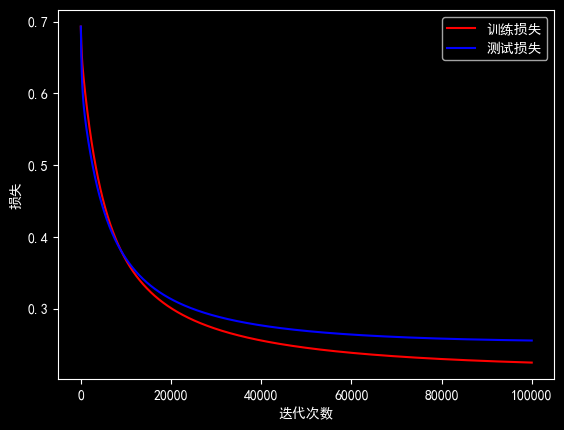

In [436]:
iter = np.arange(iters)
plt.figure()
plt.plot(iter,loss_train,'r',label='训练损失')
plt.plot(iter,loss_test,'b',label='测试损失')
plt.legend()
plt.xlabel("迭代次数")
plt.ylabel("损失")
plt.show()

In [437]:
def predict(X, W):
    p = sigmoid(X@W)
    y_ = np.array(p >= 0.5, dtype=int)
    return y_, p

In [438]:
y_train_hat, y_train_p = predict(x_train, W)
y_test_hat, y_test_p = predict(x_test, W)

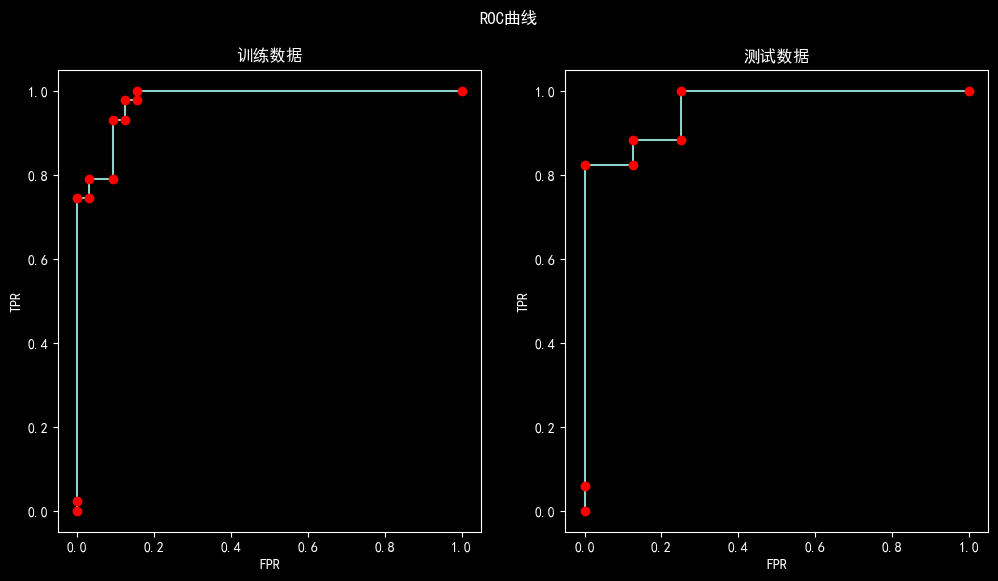

In [439]:
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_p)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.suptitle('ROC曲线')
plt.plot(fpr_train, tpr_train)
plt.plot(fpr_train, tpr_train, 'ro')
plt.title('训练数据')
plt.xlabel('FPR')
plt.ylabel('TPR')
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_p)
plt.subplot(1, 2, 2)
plt.plot(fpr_test, tpr_test)
plt.plot(fpr_test, tpr_test, 'ro')
plt.title('测试数据')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [440]:
acc_train = accuracy_score(y_train,  y_train_hat)
pre_train = precision_score(y_train, y_train_hat)
acc_test = accuracy_score(y_test,  y_test_hat)
pre_test = precision_score(y_test, y_test_hat)
F1_train = 2 * acc_train * pre_train / (acc_train + pre_train)
F1_test = 2 * acc_test * pre_test / (acc_test + pre_test)
auc_train = roc_auc_score(y_train, y_train_p)
auc_test = roc_auc_score(y_test, y_test_p)

In [441]:
eval = pd.DataFrame([['precision', pre_train, pre_test], ['recall', acc_train, acc_test],
                      ['F1_score', F1_train, F1_test], ['AUC',  auc_train, auc_test]], columns=[' ', '训练集', '测试集'])
eval

,,训练集,测试集
0,precision,0.930233,0.882353
1,recall,0.920000,0.840000
2,F1_score,0.925088,0.860656
3,AUC,0.976017,0.963235
